In [1]:
# Cargamos librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
import math as mt
from random import randint

# Carga de los datos

In [ ]:
# Cargamos los datos y obtenemos su informacion relevante
icegames_2016= pd.read_csv("/dataset/games.csv")
icegames_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se observan columnas con valores ausentes que deben ser verificados debido al numero con respecto al total de datos (Year_of_Release, Critic_Score, User_Score, Rating) y tambien existe una columna donde el tipo de dato no concuerda (User_Score). 

# Preparacion de los datos

Se verifica que las columnas no tengan espacios y se convierte a minuscula

In [3]:
def column_names_fix(cols):
    fix_column=[]
    for column_name in cols.columns:
        column_name_no_spaces=column_name.strip()
        fix_column.append(column_name_no_spaces.lower())
    return fix_column
# Se llama la funcion y se arreglan los nombres de columna
icegames_2016.columns=column_names_fix(icegames_2016)

Se verifican filas totalmente duplicadas del DF y lo que se hizo con cada una de ellas:

In [4]:
print("Filas totalmente duplicadas NAME:",icegames_2016.duplicated().sum())# No hay filas totalmente duplicadas

Filas totalmente duplicadas NAME: 0


Se verifican de cada columna los valores ausentes y duplicados si aplica, y si los datos deben ser convertidos.

In [5]:
#Name-----------------------------------------------------------------------------------------------------------------------
# Valores ausentes
print("Valores ausentes NAME:", icegames_2016["name"].isna().sum())
#Se reemplazan los dos juegos sin nombre por unknown, ya que no afectaran en el analisis posterior de datos.
icegames_2016["name"].fillna("unknown",inplace=True)
# Como cada juego puede estar en distintas plataformas, no se analizan duplicados por nombre.
print("Valores ausentes NAME despues del preprocesamiento:", icegames_2016["name"].isna().sum())

Valores ausentes NAME: 2
Valores ausentes NAME despues del preprocesamiento: 0


In [6]:
#Platform -------------------------------------------------------------------------------------------------------------------
print("Valores ausentes PLATFORM:",icegames_2016["platform"].isna().sum())# No existen valores ausentes

Valores ausentes PLATFORM: 0


In [7]:
#Year_of_release------------------------------------------------------------------------------------------------------------
print("Valores ausentes YEAR_OF_RELEASE:", icegames_2016["year_of_release"].isna().sum())#269 valores ausentes
# -----------------------------------------------------------------------------------------------
# Verificacion de datos con año ausente para encontrar un patron.
#print("Juegos con fecha de lanzamiento desconocida",icegames_2016[icegames_2016["year_of_release"].isna()].sample(20))
# -----------------------------------------------------------------------------------------------
# Se reemplazan las fechas faltantes con le fecha mas comun por plataforma.
icegames_2016['year_of_release'] = icegames_2016['year_of_release'].fillna(icegames_2016.groupby('platform')['year_of_release'].transform(lambda x: x.mode().iloc[0]))
icegames_2016["year_of_release"]= icegames_2016["year_of_release"].astype("int")
print("Valores ausentes YEAR_OF_RELEASE despues del preprocesamiento:", icegames_2016["year_of_release"].isna().sum())#0 valores ausentes
print(icegames_2016["year_of_release"].unique())


Valores ausentes YEAR_OF_RELEASE: 269
Valores ausentes YEAR_OF_RELEASE despues del preprocesamiento: 0
[2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]


- Los valores se cambiaron a enteros, ya que no existen años decimales y solo se encuentra el año y no la fecha completa. 
- los valores ausentes se llenaran con las fechas mas frecuentes segun la plataforma, ya que no existe un patron de consolas o nombre que nos indiquen a que año pertencen.

In [8]:
#Genre----------------------------------------------------------------------------------------------------------------------
print("Valores ausentes GENRE:", icegames_2016["genre"].isna().sum())
#Se reemplazan los dos juegos sin nombre genero por unknown, ya que no afectaran en el analisis posterior.
icegames_2016["genre"].fillna("unknown",inplace=True)
print("Valores ausentes GENRE despues del preprocesamiento:", icegames_2016["genre"].isna().sum())

Valores ausentes GENRE: 2
Valores ausentes GENRE despues del preprocesamiento: 0


In [9]:
#NA_sales, EU_sales, JP_sales, other_sales-------------------------------------------------------------------------------
print("Valores ausentes NA_sales:",icegames_2016["na_sales"].isna().sum())# No existen valores ausentes
print("Valores ausentes EU_sales:",icegames_2016["eu_sales"].isna().sum())# No existen valores ausentes
print("Valores ausentes JP_sales:",icegames_2016["jp_sales"].isna().sum())# No existen valores ausentes
print("Valores ausentes Other_sales:",icegames_2016["other_sales"].isna().sum())# No existen valores ausentes

Valores ausentes NA_sales: 0
Valores ausentes EU_sales: 0
Valores ausentes JP_sales: 0
Valores ausentes Other_sales: 0


In [10]:
#Critic score---------------------------------------------------------------------------------------------------------------
print("Valores ausentes Critic Score:",icegames_2016["critic_score"].isna().sum())

Valores ausentes Critic Score: 8578


8578 Valores ausentes fueron encontrados en critic_score, como los valores ausentes en la columna critic score abarcan mas de la
mitad del total de datos de la columna, cuando se analize solo se tomaran los datos que no contengan valores ausentes ya que esos
datos sesgaran el analisis posterior.

In [11]:
#user score-----------------------------------------------------------------------------------------------------------------
print("Valores ausentes User Score:",icegames_2016["user_score"].isna().sum())# 6701 valores ausentes
# Se aplicara el mismo proceso que con critic_score donde no se usaran los datos que tengan este valor ausente debido a que
#el analisis estara sesgado si los valores se llenan.

# DATOS tbd----------------------------
print("Total datos tbd: ",(icegames_2016["user_score"]=="tbd").sum()) #Total datos tbd:  2424
# Analisis datos tbd por columna, para encontrar un patron
print("Analisis datos tbd por columna, para encontrar un patron")
print("Datos TBD year_of_release")
print(icegames_2016[icegames_2016["user_score"]=="tbd"]["year_of_release"].value_counts().sort_index())
print("Datos TBD platform")
print(icegames_2016[icegames_2016["user_score"]=="tbd"]["platform"].value_counts().sort_index())
print("Datos TBD genre")
print(icegames_2016[icegames_2016["user_score"]=="tbd"]["genre"].value_counts().sort_index())


# Los Datos tbd se reemplazaran por 11 para poder realizar la conversion de los datos de object a float para su posterior
#analisis. 
icegames_2016["user_score"].replace("tbd",11,inplace=True)
icegames_2016["user_score"]=pd.to_numeric(icegames_2016["user_score"],errors="ignore")# Los datos invalidos se ignoran.

Valores ausentes User Score: 6701
Total datos tbd:  2424
Analisis datos tbd por columna, para encontrar un patron
Datos TBD year_of_release
1997      1
1998      1
1999      8
2000     43
2001     82
2002    203
2003     99
2004    107
2005    121
2006    129
2007    192
2008    338
2009    417
2010    331
2011    220
2012     24
2013     15
2014     21
2015     38
2016     34
Name: year_of_release, dtype: int64
Datos TBD platform
3DS      56
DS      756
GBA     262
GC      103
PC       49
PS       45
PS2     240
PS3      87
PS4       6
PSP     123
PSV       7
Wii     440
WiiU      5
X360     84
XB      150
XOne     11
Name: platform, dtype: int64
Datos TBD genre
Action          376
Adventure       159
Fighting         39
Misc            449
Platform        139
Puzzle          211
Racing          233
Role-Playing     30
Shooter          99
Simulation      237
Sports          413
Strategy         39
Name: genre, dtype: int64


Columna user_score:

- 6701 valores ausentes en user_score
- Se aplicara el mismo proceso que con critic_score donde no se usaran los datos que tengan este valor ausente, debido a que
el analisis estara sesgado si los valores se llenan con un valor medio o mediano.

Datos tbd:

1) Al analizar los datos tbd se encontro:
- Total datos tbd:  2424
- su año de lanzamiento va desde 1997 hasta 2016, lo que significa que no son juegos recientes.
- Se encuentran en al menos 16 plataformas y todos los generos disponibles en los datos.

2) Lo que pudo suceder con estos tbd:
- En el momento en que los datos fueron tomados la mayoria de los usuarios seguian probando los juegos para dar una puntuacion, es decir el tiempo entre el lanazamiento del juego y la toma de los datos no fue el suficiente para obtener la cifra.
- Los datos nunca fueron agregados a la base de datos.
- Los usuarios no dieron puntuaciones validas, que pudieran ser analizadas.
- Los usuarios no conocian del sistema de puntuaciones que podian dar de los juegos comprados.

Ninguna de estas hipotesis pueden ser comprobada, ya que no se cuenta con la informacion de los sucedido con esos juegos, plataforma o la tienda vendedora cuando se tomaron los datos.

3) Preprocesamiento datos tbd:
- Los Datos tbd se reemplazaran por 11, ya que el rango de votacion general es de 0 a 10. 
- Los datos se convertiran de object a float para su posterior analisis numerico.
- Los datos tbd no se tomaran en cuenta durante al analisis.


In [12]:
#rating---------------------------------------------------------------------------------------------------------------------
print("Valores ausentes rating:",icegames_2016["rating"].isna().sum())#6766 valores ausentes
# Se aplicara el mismo proceso que con critic_score donde no se usaran los datos que tengan este valor ausente debido a que
#el analisis estara sesgado si los valores se llenan.

Valores ausentes rating: 6766


In [13]:
# Se crea la columa de ventas totales
icegames_2016["total_sales"]=icegames_2016["na_sales"]+icegames_2016["eu_sales"]+icegames_2016["jp_sales"]+icegames_2016["other_sales"]

Los valores ausentes en user_score y critic_score son un porcentaje muy alto del total de datos, si estos datos se llenan con la mediana, causaran un sesgo en todos los analisis realizados.

1) user_score:

total ausentes:6701

total filas: 16715

% de datos ausentes con respecto al total: 40%

user_score tambien contiene datos tbd: 2424, los cuales sesgaran el analisis si se llenaran con la mediana.


2) critic_score:

total ausentes:6766

total filas: 16715

% de datos ausentes con respecto al total: 40.4%



Los analisis posteriores se realizaran sin tener en cuenta esos valores ausentes.

# Analisis de datos

In [14]:
# Juegos lanzados por año
print("Juegos lanzados por año:","\n",icegames_2016["year_of_release"].value_counts().sort_index(ascending=False))
icegames_2016=icegames_2016[icegames_2016["year_of_release"]>2000]

Juegos lanzados por año: 
 2016     502
2015     607
2014     581
2013     544
2012     653
2011    1216
2010    1255
2009    1460
2008    1457
2007    1197
2006    1022
2005     939
2004     762
2003     796
2002     888
2001     482
2000     351
1999     341
1998     386
1997     289
1996     263
1995     219
1994     121
1993      62
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      63
1980       9
Name: year_of_release, dtype: int64


- Entre los años 1998 y 2000 el numero de juegos lanzados se mantuvo en un rango de 341 y 386 juegos, para despues empezar
a crecer año tras año hasta un maximo de 1460 juegos en 2009.
- En el año 2001 se lanzaron un total de 482 juegos, cifra la cual se acerca al total obtenido del ultimo año.

Para el analisis se utilizaran los juegos lanzados desde el año 2001.

In [15]:
# Plataformas con mayores ventas
print(icegames_2016.groupby("platform")["total_sales"].sum().sort_values(ascending=False))
# PS2 - X360 - WII - PS3 - DS
# Distribucion de ventas totales por año para cada una de las 5 plataformas lideres en ventas totales

platform
PS2     1216.60
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
GBA      317.78
PS4      314.14
PSP      294.05
3DS      259.00
XB       256.75
PC       204.82
GC       198.93
XOne     159.32
WiiU      82.19
PSV       54.07
PS        44.33
GB         9.24
N64        3.33
DC         1.42
WS         0.28
Name: total_sales, dtype: float64


Distribucion de ventas totales por año para cada una de las 5 plataformas lideres en ventas totales:
PS2 - X360 - WII - PS3 - DS

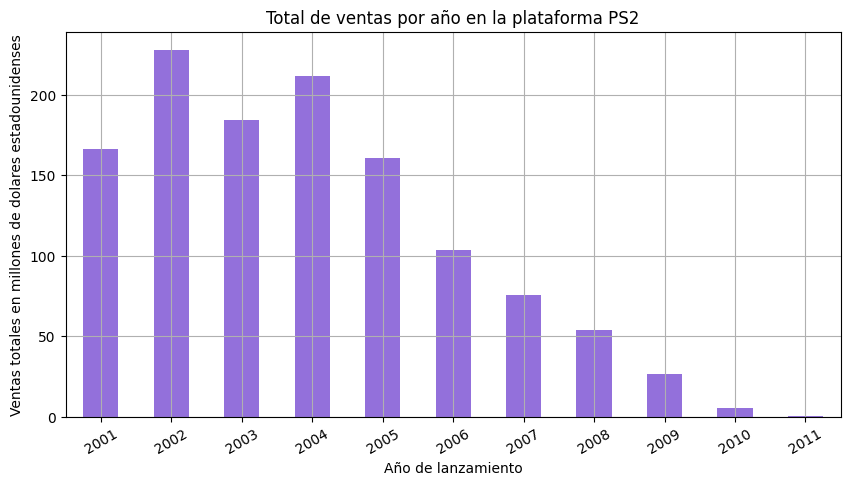

In [16]:
# PS2
icegames_ps2= icegames_2016[icegames_2016["platform"].str.lower()=="ps2"]
total_sales_ps2_per_year=icegames_ps2.groupby("year_of_release")["total_sales"].sum()
total_sales_ps2_per_year.plot(kind="bar",figsize=[10,5],color="mediumpurple",grid=True,rot=30,title="Total de ventas por año en la plataforma PS2",xlabel="Año de lanzamiento",ylabel="Ventas totales en millones de dolares estadounidenses")
plt.show()

Para la plataforma PS2 se puede evidenciar:
- Disminucion progresiva en el numero de juegos lanzados en la plataforma desde el año 2005. La plataforma presento un 5 años donde las ventas se mantuvieron.
- Se observa que el numero de juegos comenzo a disminuir cuando la nueva version de la consola (PS3) comenzo a obtener popularidad.
- El lanzamientos de nuevos juegos fue disminuyendo progresivamente desde el año 2004 hasta llegar a 0 en un total de 8 años.
- Desde el año analizado (2001), esta plataforma tuvo un punto de popularidad alto, el cual fue disminuyendo progresivamente hasta desparecer.

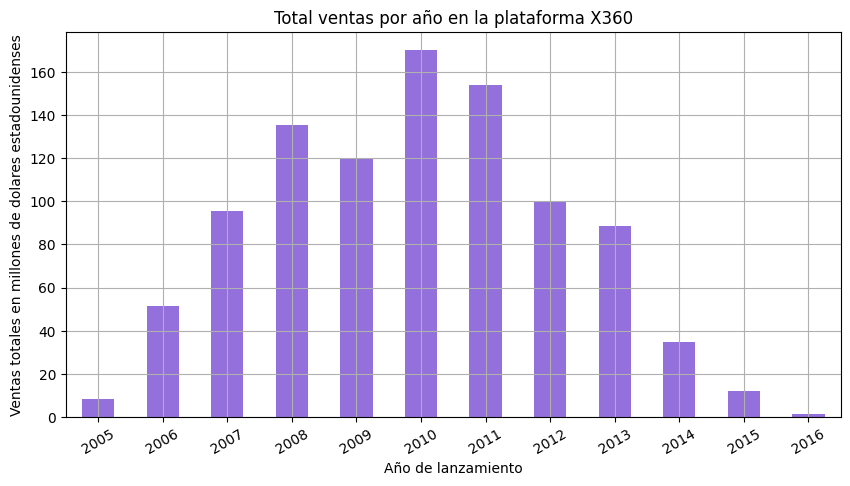

In [17]:
#X360
icegames_x360= icegames_2016[icegames_2016["platform"].str.lower()=="x360"]
total_sales_x360_per_year=icegames_x360.groupby("year_of_release")["total_sales"].sum()
total_sales_x360_per_year.plot(kind="bar",figsize=[10,5],color="mediumpurple",grid=True,rot=30,title="Total ventas por año en la plataforma X360",xlabel="Año de lanzamiento",ylabel="Ventas totales en millones de dolares estadounidenses")
plt.show()

Para la plataforma X360 se puede evidenciar:

- Un aumento progresivo en el numero de juegos desde el 2005 que llego a su punto mas alto en el año 2010, punto desde el cual posteriormente comenzo a perder popularidad y disminuir sus lanzamientos hasta un valor cercano a 0 en un total de 7 años.  
- A esta plataforma le tomo un total de 6 años llegar a su punto de popularidad mas alto.
- En el rango de fechas analizado (2001-2016), se puede analizar el inicio y fin de la popularidad de este plataforma.

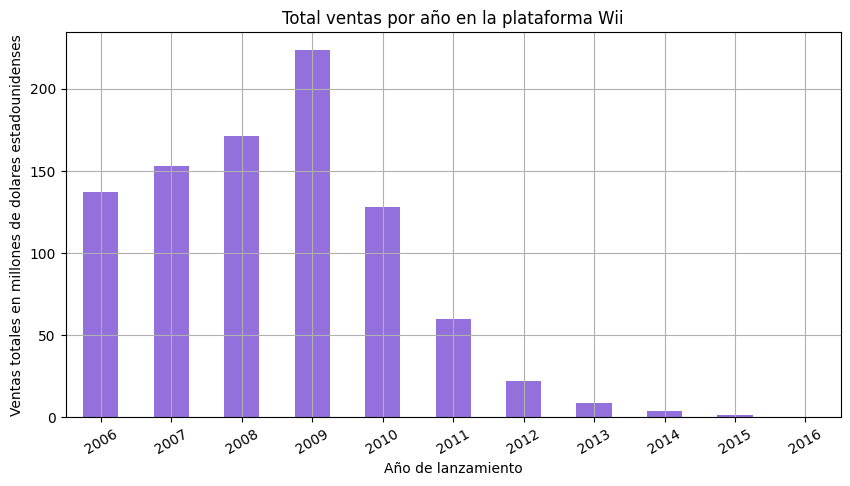

In [18]:
#wii
icegames_wii= icegames_2016[icegames_2016["platform"].str.lower()=="wii"]
total_sales_wii_per_year=icegames_wii.groupby("year_of_release")["total_sales"].sum()
total_sales_wii_per_year.plot(kind="bar",figsize=[10,5],color="mediumpurple",grid=True,rot=30,title="Total ventas por año en la plataforma Wii",xlabel="Año de lanzamiento",ylabel="Ventas totales en millones de dolares estadounidenses")
plt.show()

Para la plataforma Wii se puede evidenciar:

- La plataforma se mantuvo en aumento de popularidad por 5 años hasta el 2009, posteriormente sus ventas comenzaron a disminuir
progresivamente hasta casi desaparecer en 2016.
- A la plataforma le tomo al menos 8 años perder toda su popularidad hasta casi desaparecer.
- En las fechas analizadas (2001-2016) esta plataforma empezo en un punto de popularidad alto con respecto a las otras plataformas y fue disminuyendo progresivamente hasta desparecer.

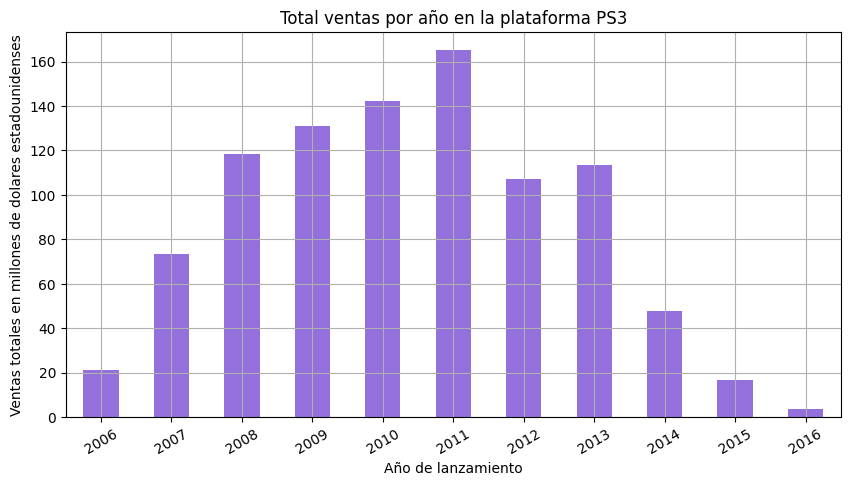

In [19]:
#PS3
icegames_ps3= icegames_2016[icegames_2016["platform"].str.lower()=="ps3"]
total_sales_ps3_per_year=icegames_ps3.groupby("year_of_release")["total_sales"].sum()
total_sales_ps3_per_year.plot(kind="bar",figsize=[10,5],color="mediumpurple",grid=True,rot=30,title="Total ventas por año en la plataforma PS3",xlabel="Año de lanzamiento",ylabel="Ventas totales en millones de dolares estadounidenses")
plt.show()

Para la plataforma PS3 se puede evidenciar:

- Se puede observar baja popularidad al inicio de su lanzamiento, el cual fue aumentando progresivamente por 6 años hasta su punto maximo en 2011.
- Se puede observar que el aumento en ventas de la PS3 desde el 2006 es inversamente proporcional con las ventas de la PS2.
- La popularidad de esta plataforma fue disminuyendo por al menos 6 años hasta casi desaparecer en 2016.
- En el rango de fechas analizado (2001-2016), se puede analizar el inicio y fin de la popularidad de este plataforma.

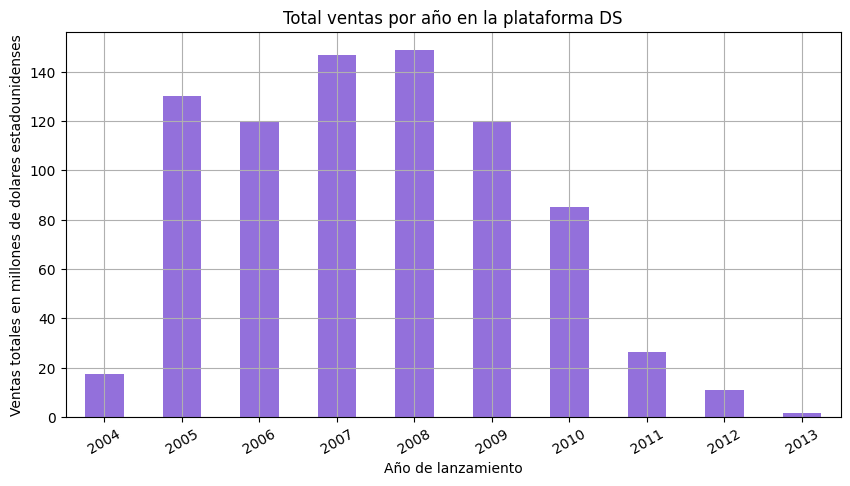

In [20]:
#DS
icegames_ds= icegames_2016[icegames_2016["platform"].str.lower()=="ds"]
total_sales_ds_per_year=icegames_ds.groupby("year_of_release")["total_sales"].sum()
total_sales_ds_per_year.plot(kind="bar",figsize=[10,5],color="mediumpurple",grid=True,rot=30,title="Total ventas por año en la plataforma DS",xlabel="Año de lanzamiento",ylabel="Ventas totales en millones de dolares estadounidenses")
plt.show()

Para la plataforma DS se puede evidenciar:

- Se observa que la plataforma el primer año tuvo un bajo nivel de popularidad, el cual aumento drasticamente para mantenerse por al menos 5 años en niveles altos de popularidad.
- Su popularidad empezo a decaer progresivamente hasta casi desaparecer en 6 años.
- En el rango de fechas analizado (2001-2016), se puede analizar el inicio y fin de la popularidad de este plataforma.

CONCLUSIONES FINALES:
1) A las plataformas nuevas les toma aproximadamente 5 - 6 años llegar a su maximo de popularidad para posteriormente empezar a disminuir.
2) A las plataformas antiguas les toma aproximadamente 6 - 8 años perder su popularidad hasta finalmente desaparecer del mercado.

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

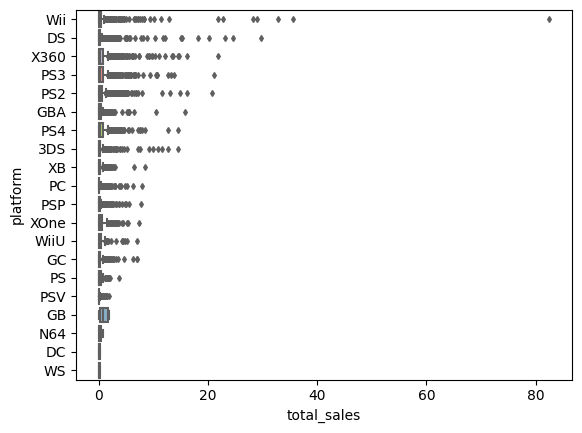

In [21]:
# Crea un diagrama de caja para las ventas globales de todos los juegos por plataforma-----------------------------------------

#Debido a los numerosos valores atipicos en las distribuciones de todas las plataformas, se filtraron los datos atipicos, para
# visualizar los datos..

#DIAGRAMA DE CAJA SIN FILTRAR DATOS:
sns.boxplot(data=icegames_2016,x=icegames_2016["total_sales"],y=icegames_2016["platform"],palette = "Set3",fliersize = 3)

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

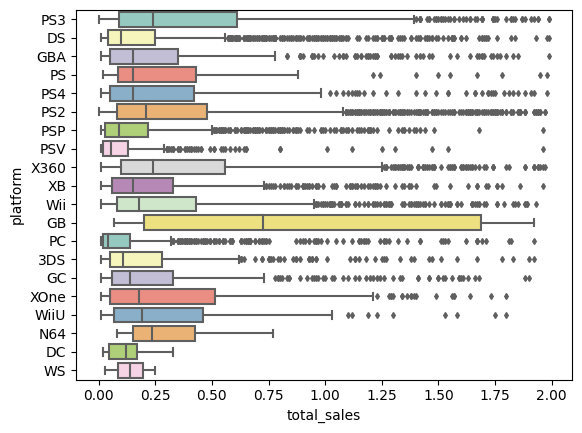

In [32]:
# DIAGRAMA DE CAJA DATOS FILTRADOS:
# Los datos filtrados se utilizaran para las posteriores pruebas de hipotesis.
icegames_2016_no_atipicos=icegames_2016[icegames_2016["total_sales"]<2]
sns.boxplot(data=icegames_2016_no_atipicos,x=icegames_2016_no_atipicos["total_sales"],y=icegames_2016_no_atipicos["platform"],palette = "Set3",fliersize = 3)

Como el total de las ventas de las plataformas contienen datos atipicos que varian significativamente con Q1 y Q3, se filtraron los datos para su correcta visualizacion y analisis en el diagrama de caja, y posteriormente en las pruebas de hipotesis.

En el digrama de caja por plataforma se evidencia:
- Solo 4 plataformas (WS, DC, N64 y GB) no poseen datos atipicos.
- Las ventas promedio de varias plataformas presentan datos cercanos. Sin embargo, hay plataformas donde:
El promedio de ventas fue significativamente menor (WS, DC, PC, PSV) y el promedio de ventas fue significativamente mayor (GB)
- Los valores atipicos demuestran la popularidad que tuvieron algunos juegos en el mercado.
- Los datos de la mayoria de las plataformas se encuentran sesgados hacia la derecha debido a que la mayoria de datos se encuentran por debajo de la mediana y el resto de datos mas grandes se encuentran al lado derecho, aumentando el valor de la media. 

<AxesSubplot:title={'center':'Critic score VS Total sales'}, xlabel='Total sales in millions of US dollars', ylabel='critic_score'>

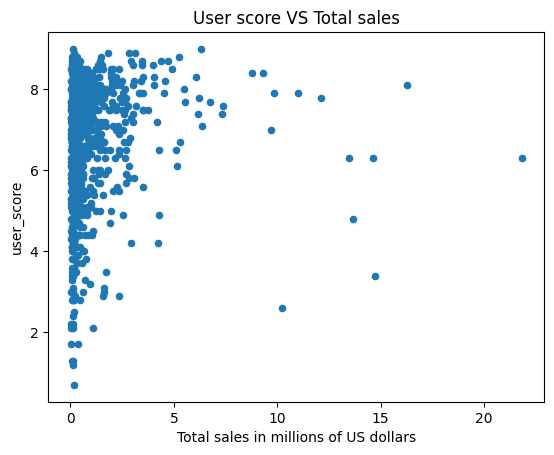

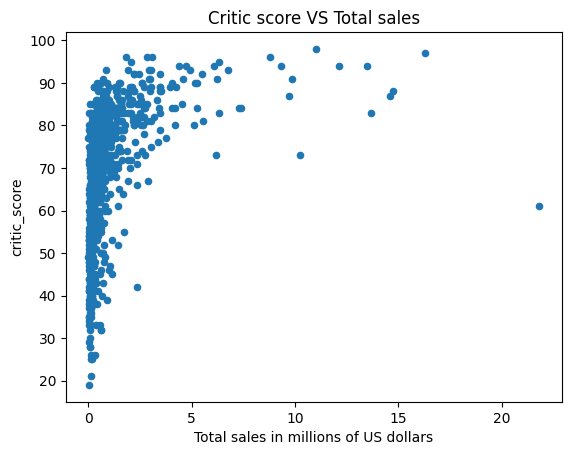

In [23]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

# X360 plataforma popular

#icegames_2016_user_score
# Se quitan los 11 que eran tbd, los ausentes y se filtra por x360
icegames_2016_user=icegames_2016[(icegames_2016["user_score"]<11) & ~(icegames_2016["user_score"].isna()) & (icegames_2016["platform"]=="X360")]
icegames_2016_user.plot(y="user_score",x="total_sales",kind="scatter",title="User score VS Total sales",xlabel="Total sales in millions of US dollars")

icegames_2016_critic=icegames_2016[~(icegames_2016["critic_score"].isna()) & (icegames_2016["platform"]=="X360")]
icegames_2016_user.plot(y="critic_score",x="total_sales",kind="scatter",title="Critic score VS Total sales",xlabel="Total sales in millions of US dollars")

User score VS Total sales
- En este grafico se puede evidenciar que la puntuacion de los usuarios no afecta significativamente en el total de ventas de juegos, la mayoria de los datos se concentran entre 0 y 2.5 aproximadamente y no aumentan siginificativamente segun la puntuacion. Sin embargo, al analizar los pocos juegos que sobrepasan ese rango, la puntuacion varia desde 2 a 9 aproximadamente, por lo que pueden existir juegos que por su popularidad, marketing, calidad o puntuacion de la critica obtuvieron ese total de ventas superiores al resto.

Critic score VS Total sales
- En este grafico se puede evidenciar que la puntuacion de la critica no afecta significativamente, pero si un poco mas que la puntuacion de usuario en el total de ventas. Ademas los juegos que superan el rango de ventas de 0 y 2.5, se concentran en puntuaciones altas de la critica a diferencia de la puntuacion de usuario donde los datos se distribuyen en diferentes puntuaciones de usuario tanto altas como bajas.


In [24]:
# Correlacion
# User_score y total_sales
print("Correlacion user_score y total_sales: ",icegames_2016_user["user_score"].corr(icegames_2016_user["total_sales"]))
#Critic_score y total_sales
print("Correlacion critic_score y total_sales: ",icegames_2016_critic["critic_score"].corr(icegames_2016_critic["total_sales"]))

Correlacion user_score y total_sales:  0.11445882978454185
Correlacion critic_score y total_sales:  0.3937358653072588


Se puede evidenciar que existe una correlacion un poco mas alta entre los datos de critic_score y total-sales, lo que significa que las ventas de algunos juegos fueron afectadas mayormente por la puntuacion de la critica y menormente por la puntuacion de los usuarios. Estos se puede visualizar en el grafico de dispersion donde la mayoria de puntos se agrupan en puntuaciones altas dadas por la critica.

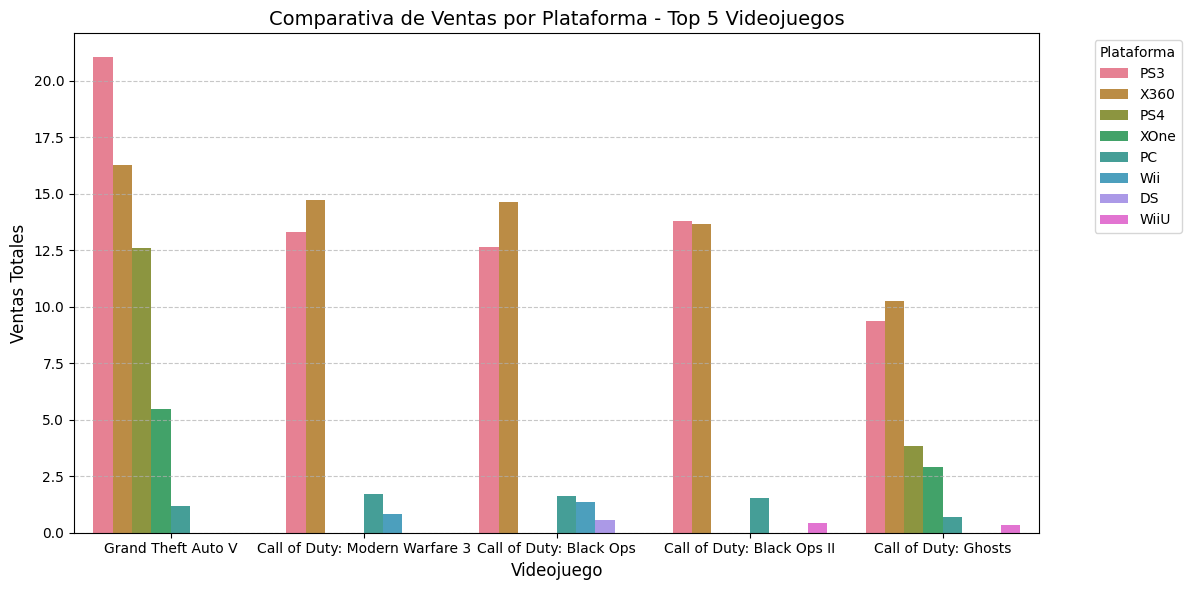

In [25]:
#Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
# Se obtuvieron los 5 juegos multiplataforma con mayores ventas y se mostraron en un grafico de barras.
icegames_2016_multiplatform=icegames_2016.groupby("name")["platform"].nunique()# Se obtienen juegos que son multiplataforma
icegames_2016_multiplatform=icegames_2016_multiplatform[icegames_2016_multiplatform>1].index # Se obtienen los juegos por indice
icegames_2016_multiplatform_filtered=icegames_2016[icegames_2016["name"].isin(icegames_2016_multiplatform)]
icegames_2016_multiplatform_high_sales= icegames_2016_multiplatform_filtered.groupby("name")["total_sales"].sum().sort_values(ascending=False).head(5).index
icegames_2016_multiplatform=icegames_2016[icegames_2016["name"].isin(icegames_2016_multiplatform_high_sales)]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=icegames_2016_multiplatform, 
    x='name', 
    y='total_sales', 
    hue='platform', 
    palette='husl'
)
plt.title("Comparativa de Ventas por Plataforma - Top 5 Videojuegos", fontsize=14)
plt.xlabel("Videojuego", fontsize=12)
plt.ylabel("Ventas Totales", fontsize=12)
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se obtuvieron los 5 juegos multiplataforma de mayores de ventas.
- Las plataformas X360 y PS3 presentan ventas similares, superiores al resto de plataformas.
- La plataforma PS4 es un nuevo lanzamiento, que estaria poco a poco obteniendo popularidad, para reemplazar a su antigua version PS3.
- Existen plataformas las cuales no alcanzaron los 2.5 millones de dolares en ventas, lo cual pudo deberse a la perdida de popularidad en las mismas, cuando los 5 juegos fueron lanzados.

In [26]:
# Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? 
#¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
icegames_2016_most_rental_genres=icegames_2016.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
print(icegames_2016_most_rental_genres)

genre
Action          1515.43
Sports          1108.95
Shooter          913.45
Misc             715.02
Role-Playing     705.32
Racing           545.35
Platform         479.56
Simulation       334.05
Fighting         296.04
Adventure        183.54
Puzzle           136.03
Strategy         108.19
Name: total_sales, dtype: float64


Analizando las ventas de juegos segun el genero se evidencia:
- La diferencia en ventas entre el primer lugar y el ultimo es al menos 14 veces mas.
- Solo dos juegos superan los mil millones de dolares en ventas (Action, Sports)

Teniendo en cuenta esta informacion se puede generalizar que juegos presentan altas y bajas ventas:

Altas ventas, juegos por encima de los 900 millones en ventas= Action, Sport y shooter

Bajas ventas, juegos por debajo de los 200 millones en ventas= Strategy, Puzzle y Adventure

El resto de juegos se encuentran en un rango promedio de ventas

# Crea un perfil de usuario para cada región

In [27]:
regions=["eu_sales","na_sales","jp_sales"]
# Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
for region in regions:
    icegames_2016_sales_by_region= icegames_2016.groupby("platform")[region].sum().sort_values(ascending=False)
    print(f"Region {region}","\n",icegames_2016_sales_by_region.head(5),"\n","total sales: ", icegames_2016_sales_by_region.head(5).sum(),"\n" )

Region eu_sales 
 platform
PS3     330.29
PS2     328.65
X360    270.76
Wii     262.21
DS      188.89
Name: eu_sales, dtype: float64 
 total sales:  1380.7999999999884 

Region na_sales 
 platform
X360    602.47
PS2     567.76
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 
 total sales:  2443.019999999991 

Region jp_sales 
 platform
DS     175.55
PS2    130.33
3DS    100.67
PS3     80.19
PSP     76.78
Name: jp_sales, dtype: float64 
 total sales:  563.5200000000011 



Las variaciones en cuotas de mercado se pueden evidenciar en:
- El total de ventas totales en na, supera el total de ventas entre jp y eu.
- Las ventas totales y por plataforma de jp son menores que las ventas de eu y na.
- Las ventas por plataforma de na superan las ventas de cualquier plataforma de las otras regiones
- La plataforma mas popular varia segun la region.
- La region jp contiene 2 plataformas en su top 5 de popularidad (3DS y PSP), las cuales no fueron populares en las otras regiones

In [28]:
# Los cinco géneros principales. Explica la diferencia.
for region in regions:
    icegames_2016_sales_by_genre= icegames_2016.groupby("genre")[region].sum().sort_values(ascending=False)
    print(f"Genre {region}","\n",icegames_2016_sales_by_genre.head(5),"\n")

Genre eu_sales 
 genre
Action     463.18
Sports     334.68
Shooter    294.47
Misc       193.94
Racing     187.40
Name: eu_sales, dtype: float64 

Genre na_sales 
 genre
Action          746.72
Sports          578.44
Shooter         495.37
Misc            365.83
Role-Playing    275.87
Name: na_sales, dtype: float64 

Genre jp_sales 
 genre
Role-Playing    227.64
Action          129.78
Misc             83.75
Sports           69.96
Platform         52.83
Name: jp_sales, dtype: float64 



Al analizar las ventas por region y genero se evidencia que:
- Existen generos que prevalecen en el top 5 de todas las regiones como lo son Action, Sports y Misc.
- El genero de accion se encuentra en el top 1 de eu y na, a diferencia de jp en el que se encuentra en segundo lugar.
- El genero role-playing es el mas popular en la region jp. Si embargo, las ventas no se comparan con el primer puesto de las otras regiones. 
- El tipo de juego a lanzar tiene que enfocarse en la region de venta, debido al tipo de genero mas consumido.

In [29]:
# Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.
# Se filtran los juegos con valor ausente en rating
icegames_2016_rating_complete=icegames_2016[~icegames_2016["rating"].isna()]

for region in regions:
    icegames_2016_rating_esrb= icegames_2016_rating_complete.groupby("rating")[region].sum().sort_values(ascending=False)
    print(f"Region - Rating {region}","\n",icegames_2016_rating_esrb,"\n")


Region - Rating eu_sales 
 rating
E       681.65
M       474.57
T       383.89
E10+    188.50
AO        0.61
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64 

Region - Rating na_sales 
 rating
E       1243.79
M        731.37
T        700.50
E10+     353.32
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64 

Region - Rating jp_sales 
 rating
E       187.42
T       123.33
M        57.82
E10+     40.20
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64 



Analizando las ventas segun su calificacion se evidencia:

jp
- No se vendieron juegos sin calificar o que su clasificacion se a para mayores de edad, lo que significa que los juegos estan enfocados en una poblacion menor de edad (-18) y con calificacion dada.
- Los juegos para todo publico y adolescentes fueron los mas vendidos, lo que significa que los juegos con contenido para adultos no son cotizados para esta poblacion
- Ningun juego sin calificacion fue vendido, lo que significa que esta calificacion puede ser obligatoria para un lanzamiento o los datos fueron tomados cuando el juego fue recien lanzado.
- Los juegos para niños pequeños no eran populares en este region.

na
- Los juegos para todo publico, adolescente y publico maduro son los mas populares en ventas.
- Existe un porcentaje de juegos con contenidos para adultos que fueron vendidos. Sin embargo, este porcentaje es pequeño con repecto al resto de calificaciones.
- Ningun juego sin calificacion fue vendido, lo que significa que esta calificacion puede ser obligatoria para un lanzamiento o los datos fueron tomados cuando el juego fue recien lanzado.
- La mayoria de los juegos estan enfocados en una poblacion menor de edad incluyendo la poblacion de niños pequeños.

eu
- Los juegos para todo publico, adolescente y publico maduro son los mas populares en ventas.
- Existe un porcentaje de juegos con contenidos para adultos que fueron vendidos. Sin embargo, este porcentaje es pequeño con repecto al resto de calificaciones.
- Existe un porcentaje de juegos que fueron lanzados con calificacion pendiente, los cuales obtuvieron ventas. Lo que significa que estos juegos fueron promocionados y comprados por los usuarios sin tener encuenta una calificacion existente.
- La mayoria de los juegos estan enfocados en una poblacion menor de edad incluyendo la poblacion de niños pequeños.
- Los juegos de contenido para adulto tiene mayor popularidad que los juegos para niños pequeños.

# Prueba las siguientes hipótesis:

In [30]:
# Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

# Se quitan los 11 que eran tbd y los ausentes
# Se usaran los datos, que no contienen datos atipicos (icegames_2016_no_atipicos)
icegames_2016_user_score=icegames_2016_no_atipicos[(icegames_2016_no_atipicos["user_score"]<11) & ~(icegames_2016_no_atipicos["user_score"].isna())]

#XBOX ONE calificaciones promedio usuario
icegames_2016_user_score_xboxone= icegames_2016_user_score[icegames_2016_user_score["platform"].str.lower()=="xone"]["user_score"]
#PC calificaciones promedio usuario
icegames_2016_user_score_pc= icegames_2016_user_score[icegames_2016_user_score["platform"].str.lower()=="pc"]["user_score"]

#---------------------------------------------------------------------------------------------------------------------  
# Se realiza una prueba de levene para verificar hipotesis nula de que las varianzas de ambos grupos de datos son iguales y
# verificar si el parametro equal_var, se utiliza como True o False.
#---------------------------------------------------------------------------------------------------------------------
result=st.levene(icegames_2016_user_score_xboxone,icegames_2016_user_score_pc)
print("Prueba de Levene:")
print('valor p levene test: ', result.pvalue) # extraer el valor p
print("Statistic value= ",result.statistic)
alpha=0.05
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula","\n","equal_var= False","\n")
else:
    print("No podemos rechazar la hipótesis nula","\n","equal_var= True","\n")
# No se rechaza la hipotesis nula: Las varianzas de ambas distribuciones son iguales, debido a que su valor p fue superior a 0.05.
# equal_var= True.


#---------------------------------------------------------------------------------------------------------------------
# Hipotesis nula: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# Hipotesis alternativa: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes
# y alguna de las plataformas en mas popular.
#Alpha= 0.01
# Se verifica la hipotesis analizando la igualdad de las medias de ambas poblaciones.
# equal_var=True
#---------------------------------------------------------------------------------------------------------------------
result=st.ttest_ind(icegames_2016_user_score_xboxone,icegames_2016_user_score_pc,equal_var=True)
print("Prueba de igualdad en las distribuciones:")
print('valor p: ', result.pvalue) # extraer el valor p
alpha=0.05
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")



Prueba de Levene:
valor p levene test:  0.23301599125124503
Statistic value=  1.4243002998939507
No podemos rechazar la hipótesis nula 
 equal_var= True 

Prueba de igualdad en las distribuciones:
valor p:  0.000878451706049193
Rechazamos la hipótesis nula


Se rechaza la hipotesis nula de: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas, ya que su valor p estuvo por debajo del umbral de significancia dado de 1%. Las calificaciones entre Xbox One y PC son diferentes.

In [31]:
# Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Se usaran los datos, que no contienen datos atipicos (icegames_2016_no_atipicos)
#Genero Accion calificaciones promedio usuario
icegames_2016_user_score_action= icegames_2016_user_score[icegames_2016_user_score["genre"].str.lower()=="action"]["user_score"]
#Genero Deportes calificaciones promedio usuario
icegames_2016_user_score_sport= icegames_2016_user_score[icegames_2016_user_score["genre"].str.lower()=="sports"]["user_score"]


#---------------------------------------------------------------------------------------------------------------------  
# Se realiza una prueba de levene para verificar hipotesis nula de que las varianzas de ambos grupos de datos son iguales y
# verificar si el parametro equal_var, se utiliza como True - False.
#---------------------------------------------------------------------------------------------------------------------
result=st.levene(icegames_2016_user_score_action,icegames_2016_user_score_sport)
print("Prueba de Levene:")
print('valor p levene test: ', result.pvalue) # extraer el valor p
print("Statistic value= ",result.statistic)
alpha=0.05
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula","\n","equal_var= False","\n")
else:
    print("No podemos rechazar la hipótesis nula","\n","equal_var= True","\n")
# Se rechaza la hipotesis nula: Las varianzas de ambas distribuciones son iguales, debido a que su valor p fue menos a 0.05.
# equal_var=False
    

#---------------------------------------------------------------------------------------------------------------------
# Hipotesis nula: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# Hipotesis alternativa: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
# y alguna de las plataformas en mas popular.
#Alpha= 0.01
# Se verifica la hipotesis analizando la igualdad de las medias de ambas poblaciones.
# equal_var=True, las muestras se tomaron de poblaciones con parametros similares.
#---------------------------------------------------------------------------------------------------------------------
result=st.ttest_ind(icegames_2016_user_score_action,icegames_2016_user_score_sport,equal_var=False)
print("Prueba de igualdad en las distribuciones:")
print('valor p: ', result.pvalue) # extraer el valor p
alpha=0.05
if result.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
    


Prueba de Levene:
valor p levene test:  0.0002722309959583158
Statistic value=  13.28786390940001
Rechazamos la hipótesis nula 
 equal_var= False 

Prueba de igualdad en las distribuciones:
valor p:  0.7384603387551176
No podemos rechazar la hipótesis nula


- No se rechaza la hipotesis nula de: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales, debido a que el valor p supero el umbral de significacion incluso si este hubiera sido del 5%. Lo que significa que existe la probabilidad de que existan calificaciones de usuario cercanas a la media de ambas distribuciones.

# CONCLUSION GENERALES


Se analizaron los datos de los juegos vendidos por la compañia Ice desde el 2001 hasta el 2016, se procesaron los datos para obtener una base datos clara y concisa para realizar el analisis correspondiente.

En los datos se pudo evidenciar:
- Los procesos de recoleccion de datos no se encuentran estandarizados, lo cual causa error en la lectura de datos y posible sesgo en los analisis.
- Desde el año 2001 las ventas generales empezaron a crecer a medida que las plataformas lanzaban nuevos juegos, promoviendo a la creacion de nuevas plataformas con propuestas nuevas de juegos que ampliaron la popularidad de los video juegos.
- La expectativa de popularidad de las plataformas durante su presencia en el mercado y como estas la perdian por las nuevas plataformas y juegos. Cada plataforma presentaba niveles de popularidad diferentes que se veian reflejados en sus ventas y la region del mundo.
- Las diferencias culturales entre regiones que se pudieron observar con el analisis de los generos mas consumidos y asi mismo la calificacion que se le daba a los respectivos juegos. Cada region es unica y gracias a sus caracterizticas se pueden obtener que juegos / generos / plataformas tendran mejor acogida por el publico en los proximos años.
- Los juegos multiplataforma permiten evidenciar la popularidad de las distintas plataformas, ya que un mismo juego presento variacion en sus ventas segun la plataforma, esta informacion permite evidenciar popularidad y preferencia de los usuarios mas alla de solo los juegos.
- Las calificaciones de los usuarios varian segun el tipo de plataforma, demostrando sus preferencias a la hora de comprar juegos. Cada plataforma demostro mejor o peor acogida dependiendo de la region.